In [1]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 6.0MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease

In [2]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm.notebook import tqdm
import pandas
import json
import pprint

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [4]:
import pandas as pd
import io

In [10]:
df = pd.read_csv('result-csv.csv')

In [11]:
df.head()

,ID,NAICS2017_CODE,level,NAICS2017_NAME,NAICS2017_DESCRIPTION
0,1,11,2,"Agriculture, Forestry, Fishing and Hunting","\nThe Agriculture, Forestry, Fishing and Hunti..."
1,2,21,2,"Mining, Quarrying, and Oil and Gas Extraction","\nThe Mining, Quarrying, and Oil and Gas Extra..."
2,3,22,2,Utilities,\nThe Utilities sector comprises establishment...
3,4,23,2,Construction,\nThe Construction sector comprises establishm...
4,5,31,2,Manufacturing,The Manufacturing sector comprises establishme...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     2200 non-null   int64 
 1   NAICS2017_CODE         2200 non-null   int64 
 2   level                  2200 non-null   int64 
 3   NAICS2017_NAME         2200 non-null   object
 4   NAICS2017_DESCRIPTION  2045 non-null   object
dtypes: int64(3), object(2)
memory usage: 86.1+ KB


In [23]:
df6 = df[df["level"] == 6].reset_index()

In [24]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  1057 non-null   int64 
 1   ID                     1057 non-null   int64 
 2   NAICS2017_CODE         1057 non-null   int64 
 3   level                  1057 non-null   int64 
 4   NAICS2017_NAME         1057 non-null   object
 5   NAICS2017_DESCRIPTION  1057 non-null   object
dtypes: int64(4), object(2)
memory usage: 49.7+ KB


In [51]:
df6[df6["NAICS2017_CODE"] == 114111]

,index,ID,NAICS2017_CODE,level,NAICS2017_NAME,NAICS2017_DESCRIPTION
52,1195,1196,114111,6,Finfish Fishing,This U.S. industry comprises establishments pr...


In [52]:
df6["NAICS2017_CODE"][52]

114111

In [53]:
"https://www.naics.com/naics-code-description/?code=" + str(df6["NAICS2017_CODE"][52])

'https://www.naics.com/naics-code-description/?code=114111'

In [54]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.naics.com/naics-code-description/?code=" + str(df6["NAICS2017_CODE"][52]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text', 'title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


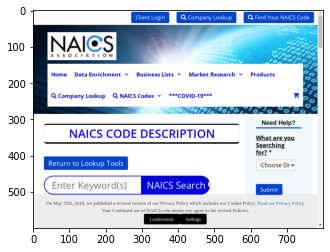

In [55]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [56]:
title = wd.find_elements_by_css_selector(".sixDigit")[0].text
print(title)

114111 - Finfish Fishing


In [57]:
text = wd.find_elements_by_css_selector("div > div > p")
print(text[0].text)

This U.S. industry comprises establishments primarily engaged in the commercial catching or taking of finfish (e.g., bluefish, salmon, trout, tuna) from their natural habitat.

Cross-References. Establishments primarily engaged in--


In [58]:
elements = wd.find_elements_by_css_selector("table.table-striped tr td:nth-child(4)")


In [59]:
len(elements)

38

In [60]:
print(elements[10].text)

Grouper fishing


In [63]:
import pprint
naics = []
entries = []
i = 0
for codice in tqdm(df6['NAICS2017_CODE']):
  i = i + 1
  text = ""
  title = ""
  try:
    wd.get("https://www.naics.com/naics-code-description/?code=" + str(codice))
    if (len(wd.find_elements_by_css_selector(".sixDigit")) > 0):
      title = wd.find_elements_by_css_selector(".sixDigit")[0].text
    if (len(wd.find_elements_by_css_selector("div > div > p")) > 0):
      text = wd.find_elements_by_css_selector("div > div > p")[0].text
    elements = wd.find_elements_by_css_selector("table.table-striped tr td:nth-child(4)")
    for element in elements:
      entries.append({'codice': codice, 'entry': element.text})
  except Exception as e:
    print(e)
    pass
  naics.append({'codice': codice,
                'title': title,
                'text': text})

len(naics)
pprint.pprint(naics[0:5])


[{'codice': 111110,
  'text': 'This industry comprises establishments primarily engaged in growing '
          'soybeans and/or producing soybean seeds.\n'
          '\n'
          'Cross-References.',
  'title': '111110 - Soybean Farming'},
 {'codice': 111120,
  'text': 'This industry comprises establishments primarily engaged in growing '
          'fibrous oilseed producing plants and/or producing oilseed seeds, '
          'such as sunflower, safflower, flax, rape, canola, and sesame.\n'
          '\n'
          'Cross-References. Establishments primarily engaged in--',
  'title': '111120 - Oilseed (except Soybean) Farming'},
 {'codice': 111130,
  'text': 'This industry comprises establishments primarily engaged in growing '
          'dry peas, beans, and/or lentils.\n'
          '\n'
          'Cross-References.',
  'title': '111130 - Dry Pea and Bean Farming'},
 {'codice': 111140,
  'text': 'This industry comprises establishments primarily engaged in growing '
          'wheat 

In [65]:
import pandas as pd
df_naics = pd.DataFrame(naics)
df_naics.set_index("codice")
df_naics.head()

,codice,title,text
0,111110,111110 - Soybean Farming,This industry comprises establishments primari...
1,111120,111120 - Oilseed (except Soybean) Farming,This industry comprises establishments primari...
2,111130,111130 - Dry Pea and Bean Farming,This industry comprises establishments primari...
3,111140,111140 - Wheat Farming,This industry comprises establishments primari...
4,111150,111150 - Corn Farming,This industry comprises establishments primari...


In [66]:
df_naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   codice  1057 non-null   int64 
 1   title   1057 non-null   object
 2   text    1057 non-null   object
dtypes: int64(1), object(2)
memory usage: 24.9+ KB


In [67]:
df_naics.to_csv('naics.csv')

In [70]:
import pandas as pd
df_entries = pd.DataFrame(entries)
df_entries.head()

,codice,entry
0,111110,"Soybean farming, field and seed production"
1,111120,"Canola farming, field and seed production"
2,111120,"Flaxseed farming, field and seed production"
3,111120,"Mustard seed farming, field and seed production"
4,111120,"Oilseed farming (except soybean), field and se..."


In [71]:
df_entries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20057 entries, 0 to 20056
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   codice  20057 non-null  int64 
 1   entry   20057 non-null  object
dtypes: int64(1), object(1)
memory usage: 313.5+ KB


In [72]:
df_naics.to_csv('entries.csv')